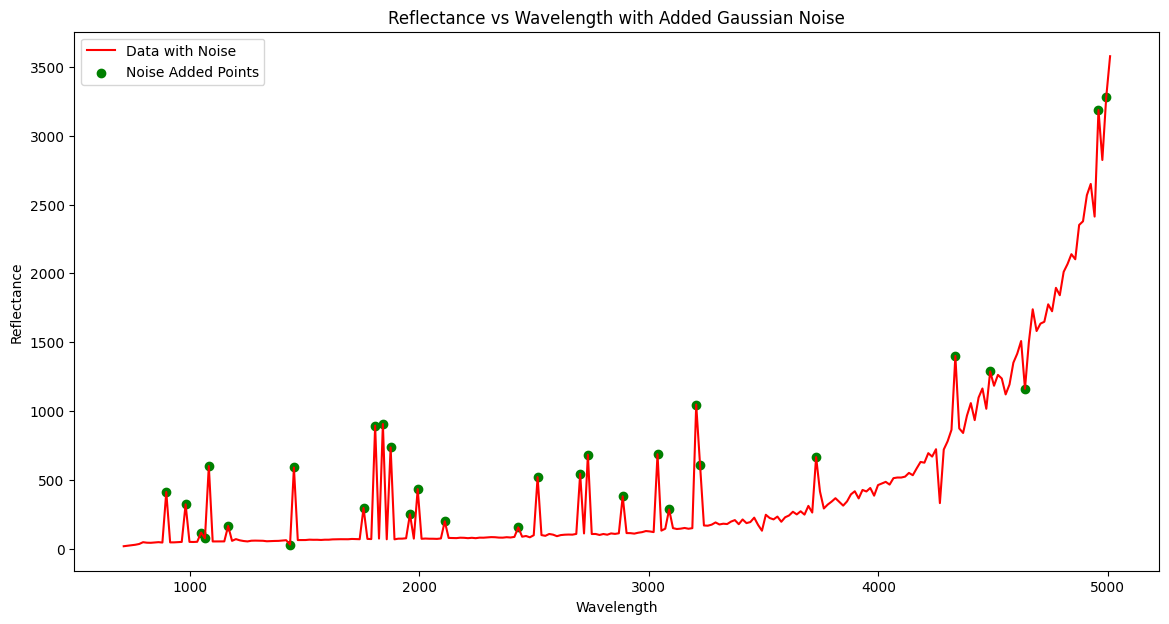

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv(r"C:\Users\sohaml.KORES-INDIA\Downloads\reflectance_data.csv")  # replace 'your_data.csv' with your actual file path

# Define the mean and standard deviation for the Gaussian noise
mean = 300
std_dev = 300  # Adjust this value as needed

# Select 20 random indices
random_indices = np.random.choice(data.index, size=30, replace=False)

# Create a copy of the original data for comparison
data_with_noise = data.copy()

# Add Gaussian noise to the Reflectance column at the selected indices
data_with_noise.loc[random_indices, 'Reflectance'] += np.random.normal(mean, std_dev, 30)

# Plot the data
plt.figure(figsize=(14, 7))

# Original data plot

# Data with noise plot
plt.plot(data_with_noise['Wavelength'], data_with_noise['Reflectance'], label='Data with Noise', color='red', linestyle='-')

# Highlight the points where noise was added
plt.scatter(data_with_noise.loc[random_indices, 'Wavelength'], data_with_noise.loc[random_indices, 'Reflectance'], color='green', label='Noise Added Points')

# Adding titles and labels
plt.title('Reflectance vs Wavelength with Added Gaussian Noise')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.legend()

# Show plot
plt.show()


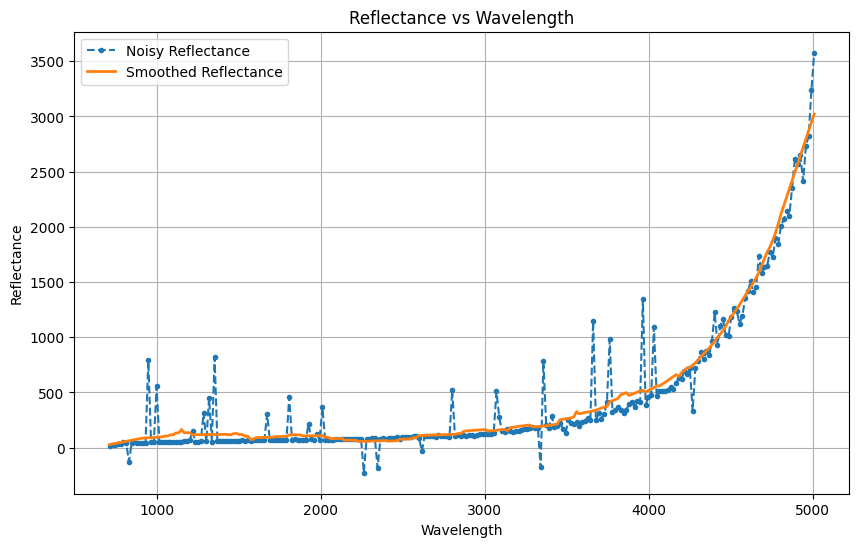

In [6]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# Load the noisy data
noisy_data = pd.read_csv(r"C:\Users\sohaml.KORES-INDIA\Downloads\After_gaussian.csv")

# Extract Wavelength and Reflectance
wavelength = noisy_data['Wavelength']
reflectance_noisy = noisy_data['Reflectance']

# Apply Savitzky-Golay filter to smooth the reflectance data
window_size = 25  # Choose an odd number for the window size
polynomial_order = 1 # Polynomial order for the filter
reflectance_smoothed = savgol_filter(reflectance_noisy, window_size, polynomial_order)

# Plot the original noisy and smoothed reflectance data
plt.figure(figsize=(10, 6))
plt.plot(wavelength, reflectance_noisy, label='Noisy Reflectance', linestyle='--', marker='o', markersize=3)
plt.plot(wavelength, reflectance_smoothed, label='Smoothed Reflectance', linestyle='-', linewidth=2)
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.title('Reflectance vs Wavelength')
plt.legend()
plt.grid(True)
plt.show()



In [8]:
import numpy as np
from scipy.io import loadmat

def characterize_noise(image_plane):
    # Number of wavelengths
    num_wavelengths = image_plane.shape[0]
    
    # Initialize an array to store correlation coefficients
    correlation_coefficients = np.zeros(num_wavelengths)
    
    # Compute correlation coefficients between each pair of neighboring image planes
    for i in range(num_wavelengths - 1):
        Yk = image_plane[i]
        Yk_next = image_plane[i + 1]
        cov_Yk_Yk_next = np.cov(Yk.flatten(), Yk_next.flatten())[0, 1]
        var_Yk = np.var(Yk.flatten())
        var_Yk_next = np.var(Yk_next.flatten())
        R = cov_Yk_Yk_next / np.sqrt(var_Yk * var_Yk_next)
        correlation_coefficients[i] = R
    
    # Calculate mean correlation using a sliding window approach
    window_size = int(0.1 * num_wavelengths)  # Window size is 10% of total wavelengths
    mean_correlation = np.zeros(num_wavelengths)
    
    for i in range(num_wavelengths):
        start_index = max(0, i - window_size // 2)
        end_index = min(num_wavelengths, i + window_size // 2)
        mean_correlation[i] = np.mean(correlation_coefficients[start_index:end_index])
    
    # Determine the median of mean correlation coefficients
    median_mean_correlation = np.median(mean_correlation)
    
    # Classify each image plane based on noise level
    classified_noise = np.zeros(num_wavelengths)
    low_noise_threshold = median_mean_correlation
    
    for i in range(num_wavelengths):
        if mean_correlation[i] >= low_noise_threshold:
            classified_noise[i] = 1  # High-level noise
        else:
            classified_noise[i] = 0  # Low-level noise
    
    return classified_noise

# Example usage:
if __name__ == "__main__":
    # Load your actual HSI data from MATLAB file
    mat_file = 'D:/test_images/ch2_iir_nci_20240131T2241351052_d_img_d18.mat'
    mat_data = loadmat(mat_file)
    
    # Extract hyperspectral data cube
    all_bands_data = mat_data['all_bands']
    
    # Assuming all_bands_data shape is (256, 14678, 250)
    num_wavelengths, n, p = all_bands_data.shape
    
    # Process each wavelength image plane
    for band_index in range(num_wavelengths):
        image_plane = all_bands_data[band_index]
        
        # Classify noise for the current image plane
        noise_classification = characterize_noise(image_plane)
        
        # Print or use noise_classification for further processing
        print(f"Band {band_index}: Noise Classification - {noise_classification}")


Band 0: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Band 1: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Band 2: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Band 3: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Band 4: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Band 5: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Band 6: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Band 7: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Band 8: Noise Classification - [1. 1. 1. ... 1. 1. 1.]
Band 9: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Band 10: Noise Classification - [1. 1. 0. ... 1. 1. 1.]
Band 11: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Band 12: Noise Classification - [1. 1. 1. ... 1. 1. 1.]
Band 13: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Band 14: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Band 15: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Band 16: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Band 17: Noise Classification - [0. 0. 0. ... 1. 1. 1.]
Ba

[array([[4.2515861 , 3.95843014, 4.18596695, ..., 4.12875624, 4.41065647,
         4.41771666],
        [3.97824235, 3.40325077, 3.84538919, ..., 3.81250768, 3.8760746 ,
         4.12600825],
        [3.93871954, 3.76376389, 3.81832198, ..., 3.53837244, 4.53817253,
         4.19264821],
        ...,
        [3.93501357, 3.97297662, 3.97585485, ..., 3.92454639, 4.44064743,
         3.90031117],
        [3.724527  , 4.06229229, 3.75702937, ..., 3.51457417, 4.32286496,
         4.01039891],
        [3.94081727, 3.85607383, 4.32619446, ..., 3.97209902, 3.53923343,
         4.05422733]]),
 [array([[-3.65604227e-01, -5.05443987e-01, -1.93185627e-01, ...,
           1.84272951e-01,  1.40898297e-01,  6.09630775e-01],
         [ 3.31107519e-01,  3.10820124e-01, -7.27206954e-02, ...,
          -3.81561144e-01,  3.88618714e-02,  7.75932763e-02],
         [ 1.77594083e-01, -3.81432645e-01,  2.76960115e-01, ...,
          -6.92667917e-01,  4.23628623e-01, -5.59996625e-01],
         ...,
         [ 